In [1]:
import torch

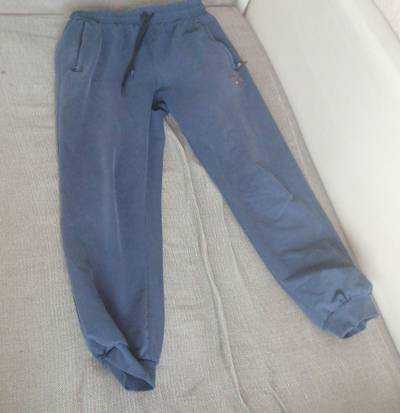

In [2]:
from PIL import Image
import numpy as np

# Load an image
img = Image.open('clothing-dataset-small/train/pants/0098b991-e36e-4ef1-b5ee-4154b21e2a92.jpg')

img


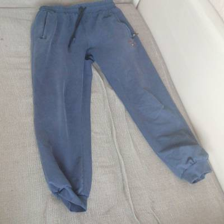

In [3]:
# Resize to target size
img = img.resize((224, 224))

img


In [4]:
# Convert to numpy array
x = np.array(img)
print(x.shape)  # (224, 224, 3)

(224, 224, 3)


In [5]:
import torchvision.models as models
from torchvision import transforms

In [6]:
# Load pre-trained model
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/paradx/.var/app/com.visualstudio.code/cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100.0%


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [7]:

# Preprocessing for MobileNetV2
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
preprocess(img)

tensor([[[0.8276, 0.7933, 0.7762,  ..., 1.8379, 1.8208, 1.8037],
         [0.8447, 0.8104, 0.7933,  ..., 1.8379, 1.8037, 1.8037],
         [0.8618, 0.8276, 0.8104,  ..., 1.8550, 1.8037, 1.8037],
         ...,
         [0.7762, 0.7248, 0.7419,  ..., 0.8447, 0.8447, 0.7933],
         [0.7591, 0.7591, 0.7591,  ..., 0.8618, 0.8618, 0.8276],
         [0.7248, 0.6906, 0.6734,  ..., 0.8447, 0.8618, 0.8618]],

        [[0.9580, 0.9230, 0.9055,  ..., 1.9384, 1.9209, 1.9034],
         [0.9755, 0.9405, 0.9230,  ..., 1.9384, 1.9034, 1.9034],
         [0.9930, 0.9580, 0.9405,  ..., 1.9384, 1.8859, 1.9034],
         ...,
         [0.8004, 0.7479, 0.7654,  ..., 0.8704, 0.8704, 0.8179],
         [0.7829, 0.7829, 0.7829,  ..., 0.8529, 0.8704, 0.8354],
         [0.7479, 0.7129, 0.6954,  ..., 0.8354, 0.8529, 0.8529]],

        [[1.1062, 1.0714, 1.0539,  ..., 1.9951, 1.9777, 1.9603],
         [1.1237, 1.0888, 1.0714,  ..., 1.9951, 1.9603, 1.9603],
         [1.1411, 1.1062, 1.0888,  ..., 1.9951, 1.9428, 1.

In [9]:
x = preprocess(img)
batch_t = torch.unsqueeze(x, 0)


In [10]:
batch_t

tensor([[[[0.8276, 0.7933, 0.7762,  ..., 1.8379, 1.8208, 1.8037],
          [0.8447, 0.8104, 0.7933,  ..., 1.8379, 1.8037, 1.8037],
          [0.8618, 0.8276, 0.8104,  ..., 1.8550, 1.8037, 1.8037],
          ...,
          [0.7762, 0.7248, 0.7419,  ..., 0.8447, 0.8447, 0.7933],
          [0.7591, 0.7591, 0.7591,  ..., 0.8618, 0.8618, 0.8276],
          [0.7248, 0.6906, 0.6734,  ..., 0.8447, 0.8618, 0.8618]],

         [[0.9580, 0.9230, 0.9055,  ..., 1.9384, 1.9209, 1.9034],
          [0.9755, 0.9405, 0.9230,  ..., 1.9384, 1.9034, 1.9034],
          [0.9930, 0.9580, 0.9405,  ..., 1.9384, 1.8859, 1.9034],
          ...,
          [0.8004, 0.7479, 0.7654,  ..., 0.8704, 0.8704, 0.8179],
          [0.7829, 0.7829, 0.7829,  ..., 0.8529, 0.8704, 0.8354],
          [0.7479, 0.7129, 0.6954,  ..., 0.8354, 0.8529, 0.8529]],

         [[1.1062, 1.0714, 1.0539,  ..., 1.9951, 1.9777, 1.9603],
          [1.1237, 1.0888, 1.0714,  ..., 1.9951, 1.9603, 1.9603],
          [1.1411, 1.1062, 1.0888,  ..., 1

In [11]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [12]:

# Make prediction
with torch.no_grad():
    output = model(batch_t)

# Get top predictions
_, indices = torch.sort(output, descending=True)

In [15]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt




7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]87Saving 'imagenet_classes.txt'
87imagenet_classes.txt 100% [=============================>]    5.10K    --.-KB/s87HTTP response 200  [https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt]
87imagenet_classes.txt 100% [=============================>]    5.10K    --.-KB/s87[Files: 1  Bytes: 5.10K [38.97K]8

In [18]:
indices[0][:10]

tensor([608, 834, 841, 474, 689, 824, 869, 906, 501, 885])

In [19]:
# Load ImageNet class names
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
 
# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: jean
2: suit
3: sweatshirt
4: cardigan
5: overskirt


In [21]:
import os
from torch.utils.data import Dataset

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [50]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Training transforms WITH augmentation
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [51]:
from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [26]:
import torch.nn as nn

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()
        
        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')
        
        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Remove original classifier
        self.base_model.classifier = nn.Identity()
        
        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

In [27]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClothingClassifierMobileNet(num_classes=10)
model.to(device)

ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [28]:
device

device(type='cuda')

In [29]:
model.forward(torch.rand(1,3,224,224).to(device))

tensor([[ 0.5523, -0.4876, -0.3982, -0.4698,  0.0998,  0.1796, -0.1696,  0.0458,
         -0.0083, -0.0957]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [31]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over the training data
    for inputs, labels in train_loader:
        # Move data to the specified device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Disable gradient calculation for validation
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Move data to the specified device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            # Update total and correct predictions
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/10
  Train Loss: 1.5273, Train Acc: 0.6206
  Val Loss: 0.6870, Val Acc: 0.7449
Epoch 2/10
  Train Loss: 0.7091, Train Acc: 0.7790
  Val Loss: 0.7641, Val Acc: 0.7478
Epoch 3/10
  Train Loss: 0.6644, Train Acc: 0.7973
  Val Loss: 0.8171, Val Acc: 0.7830
Epoch 4/10
  Train Loss: 0.6914, Train Acc: 0.7920
  Val Loss: 0.9676, Val Acc: 0.7625
Epoch 5/10
  Train Loss: 0.6333, Train Acc: 0.8152
  Val Loss: 1.1815, Val Acc: 0.7155
Epoch 6/10
  Train Loss: 0.5163, Train Acc: 0.8393
  Val Loss: 1.0250, Val Acc: 0.7537
Epoch 7/10
  Train Loss: 0.4740, Train Acc: 0.8589
  Val Loss: 1.0051, Val Acc: 0.7478
Epoch 8/10
  Train Loss: 0.4519, Train Acc: 0.8634
  Val Loss: 1.0245, Val Acc: 0.7595
Epoch 9/10
  Train Loss: 0.4971, Train Acc: 0.8569
  Val Loss: 1.0873, Val Acc: 0.7537
Epoch 10/10
  Train Loss: 0.3909, Train Acc: 0.8833
  Val Loss: 1.3693, Val Acc: 0.7302


In [33]:
def make_model(learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [34]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f'\n=== Learning Rate: {lr} ===')
    model, optimizer = make_model(learning_rate=lr)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== Learning Rate: 0.0001 ===
Epoch 1/10
  Train Loss: 1.9634, Train Acc: 0.3158
  Val Loss: 1.7692, Val Acc: 0.4018
Epoch 2/10
  Train Loss: 1.6148, Train Acc: 0.4987
  Val Loss: 1.4879, Val Acc: 0.5337
Epoch 3/10
  Train Loss: 1.3892, Train Acc: 0.5893
  Val Loss: 1.2998, Val Acc: 0.6217
Epoch 4/10
  Train Loss: 1.2317, Train Acc: 0.6535
  Val Loss: 1.1644, Val Acc: 0.6569
Epoch 5/10
  Train Loss: 1.1187, Train Acc: 0.6871
  Val Loss: 1.0797, Val Acc: 0.6716
Epoch 6/10
  Train Loss: 1.0251, Train Acc: 0.7239
  Val Loss: 0.9855, Val Acc: 0.7126
Epoch 7/10
  Train Loss: 0.9482, Train Acc: 0.7464
  Val Loss: 0.9377, Val Acc: 0.7214
Epoch 8/10
  Train Loss: 0.9004, Train Acc: 0.7516
  Val Loss: 0.8785, Val Acc: 0.7419
Epoch 9/10
  Train Loss: 0.8593, Train Acc: 0.7718
  Val Loss: 0.8542, Val Acc: 0.7390
Epoch 10/10
  Train Loss: 0.8179, Train Acc: 0.7826
  Val Loss: 0.8121, Val Acc: 0.7419

=== Learning Rate: 0.001 ===
Epoch 1/10
  Train Loss: 1.3660, Train Acc: 0.5570
  Val Loss: 0.873

In [52]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'clothing_v4_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [53]:
import torch.nn as nn

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()
        
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')
        
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        self.base_model.classifier = nn.Identity()
        
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

In [54]:
def make_model(
        learning_rate=0.001,
        size_inner=100,
        droprate=0.2
):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner,
        droprate=droprate
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [38]:
for size_inner in [10, 100, 1000]:
    print(f'\n=== Size inner: {lr} ===')
    model, optimizer = make_model(learning_rate=0.001)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== Size inner: 0.1 ===
Epoch 1/10
  Train Loss: 1.3742, Train Acc: 0.5606
  Val Loss: 0.8879, Val Acc: 0.6657
Epoch 2/10
  Train Loss: 0.7463, Train Acc: 0.7630
  Val Loss: 0.6740, Val Acc: 0.7478
Epoch 3/10
  Train Loss: 0.5961, Train Acc: 0.8048
  Val Loss: 0.6551, Val Acc: 0.7625
Epoch 4/10
  Train Loss: 0.5244, Train Acc: 0.8181
  Val Loss: 0.5932, Val Acc: 0.7918


KeyboardInterrupt: 

In [43]:
size_inner = 100
learning_rate = 0.001

model, optimizer = make_model(size_inner=size_inner, learning_rate=learning_rate)
train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Epoch 1/10
  Train Loss: 1.2738, Train Acc: 0.5883
  Val Loss: 0.7735, Val Acc: 0.7361
Checkpoint saved: clothing_v2_01_0.736.pth
Epoch 2/10
  Train Loss: 0.7022, Train Acc: 0.7728
  Val Loss: 0.6448, Val Acc: 0.7918
Checkpoint saved: clothing_v2_02_0.792.pth
Epoch 3/10
  Train Loss: 0.5904, Train Acc: 0.8022
  Val Loss: 0.6190, Val Acc: 0.7859
Epoch 4/10
  Train Loss: 0.5098, Train Acc: 0.8305
  Val Loss: 0.5469, Val Acc: 0.8152
Checkpoint saved: clothing_v2_04_0.815.pth
Epoch 5/10
  Train Loss: 0.4716, Train Acc: 0.8435
  Val Loss: 0.5220, Val Acc: 0.8094
Epoch 6/10
  Train Loss: 0.4642, Train Acc: 0.8419
  Val Loss: 0.5375, Val Acc: 0.8006
Epoch 7/10
  Train Loss: 0.4057, Train Acc: 0.8615
  Val Loss: 0.5970, Val Acc: 0.7801
Epoch 8/10
  Train Loss: 0.4003, Train Acc: 0.8589
  Val Loss: 0.5515, Val Acc: 0.8035
Epoch 9/10
  Train Loss: 0.3337, Train Acc: 0.8869
  Val Loss: 0.5932, Val Acc: 0.7801
Epoch 10/10
  Train Loss: 0.3412, Train Acc: 0.8801
  Val Loss: 0.5308, Val Acc: 0.8211


In [47]:
num_epochs = 50

for droprate in [0.2]:#[0.1, 0.2, 0.5, 0.7]:
    print(f'\n=== drop rate: {droprate} ===')
    model, optimizer = make_model(learning_rate=0.001, size_inner=100, droprate=droprate)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== drop rate: 0.2 ===
Epoch 1/50
  Train Loss: 1.3322, Train Acc: 0.5756
  Val Loss: 0.8354, Val Acc: 0.7009
Checkpoint saved: clothing_v3_01_0.701.pth
Epoch 2/50
  Train Loss: 0.7981, Train Acc: 0.7331
  Val Loss: 0.6444, Val Acc: 0.7771
Checkpoint saved: clothing_v3_02_0.777.pth
Epoch 3/50
  Train Loss: 0.6797, Train Acc: 0.7826
  Val Loss: 0.6127, Val Acc: 0.8094
Checkpoint saved: clothing_v3_03_0.809.pth
Epoch 4/50
  Train Loss: 0.5966, Train Acc: 0.7956
  Val Loss: 0.6301, Val Acc: 0.7713
Epoch 5/50
  Train Loss: 0.5528, Train Acc: 0.8149
  Val Loss: 0.5501, Val Acc: 0.8240
Checkpoint saved: clothing_v3_05_0.824.pth
Epoch 6/50
  Train Loss: 0.5177, Train Acc: 0.8194
  Val Loss: 0.5913, Val Acc: 0.7918
Epoch 7/50
  Train Loss: 0.4589, Train Acc: 0.8458
  Val Loss: 0.5731, Val Acc: 0.8065
Epoch 8/50
  Train Loss: 0.4328, Train Acc: 0.8572
  Val Loss: 0.5672, Val Acc: 0.7801
Epoch 9/50
  Train Loss: 0.4176, Train Acc: 0.8572
  Val Loss: 0.5545, Val Acc: 0.7947
Epoch 10/50
  Train L

KeyboardInterrupt: 

In [55]:
size_inner = 100
learning_rate = 0.001
droprate = 0.2
num_epochs = 50

model, optimizer = make_model(size_inner=size_inner, learning_rate=learning_rate)
train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Epoch 1/50
  Train Loss: 1.4002, Train Acc: 0.5346
  Val Loss: 0.8984, Val Acc: 0.7507
Checkpoint saved: clothing_v4_01_0.751.pth
Epoch 2/50
  Train Loss: 0.9036, Train Acc: 0.7060
  Val Loss: 0.7016, Val Acc: 0.7742
Checkpoint saved: clothing_v4_02_0.774.pth
Epoch 3/50
  Train Loss: 0.7306, Train Acc: 0.7581
  Val Loss: 0.6461, Val Acc: 0.7889
Checkpoint saved: clothing_v4_03_0.789.pth
Epoch 4/50
  Train Loss: 0.6525, Train Acc: 0.7832
  Val Loss: 0.6137, Val Acc: 0.7830
Epoch 5/50
  Train Loss: 0.6082, Train Acc: 0.7888
  Val Loss: 0.5907, Val Acc: 0.7977
Checkpoint saved: clothing_v4_05_0.798.pth
Epoch 6/50
  Train Loss: 0.6117, Train Acc: 0.7911
  Val Loss: 0.5677, Val Acc: 0.8006
Checkpoint saved: clothing_v4_06_0.801.pth
Epoch 7/50
  Train Loss: 0.5533, Train Acc: 0.8077
  Val Loss: 0.6113, Val Acc: 0.7683
Epoch 8/50
  Train Loss: 0.5254, Train Acc: 0.8119
  Val Loss: 0.5307, Val Acc: 0.8270
Checkpoint saved: clothing_v4_08_0.827.pth
Epoch 9/50
  Train Loss: 0.5153, Train Acc: 0.

KeyboardInterrupt: 

In [56]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [61]:
path="/home/paradx/CODE/TECHFRONTIER/machine-learning-zoomcamp/08-deep-learning/codes/clothing_v4_08_0.827.pth"

# Load model
model = ClothingClassifierMobileNet(size_inner=100, droprate=0.2, num_classes=10)
model.load_state_dict(torch.load(path))
model.to(device)
model.eval()

/tmp/ipykernel_542/650509776.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [ ]:
x = val_transforms(img)

batch_t = torch.unsqueeze(x,0).to(device)

with torch.no_grad():
    output = model(batch_t)

# _, indices = torch.sort(output, descending=True)

In [69]:
dict(zip(classes, output[0].to('cpu')))

{'dress': tensor(-0.3554),
 'hat': tensor(-3.3419),
 'longsleeve': tensor(-0.2085),
 'outwear': tensor(-1.3940),
 'pants': tensor(6.3900),
 'shirt': tensor(0.1056),
 'shoes': tensor(0.1205),
 'shorts': tensor(-1.2169),
 'skirt': tensor(-0.4477),
 't-shirt': tensor(-4.9972)}

In [67]:
list(train_dataset.class_to_idx)

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [68]:
classes=['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [71]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.4 MB/s  0:00:00eta 0:00:01


In [73]:
# Create dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"Model exported to {onnx_path}")

Model exported to clothing_classifier_mobilenet_v2.onnx
